<a href="https://colab.research.google.com/github/IrfanRasyid/Data-Analyst-Portofolio/blob/main/Python/Python_DA11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA PREPARATION

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import BDay

#Dataset

Data yang digunakan adalah data yang berasal dari Tokopedia (***bukan data sesungguhnya***). Mengenai penjelasan dataset adalah sebagai berikut:

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
**order_detail:**
id 			|object| angka unik dari order / id_order
customer_id 		|object|angka unik dari pelanggan
order_date 		|object| tanggal saat dilakukan transaksi
sku_id 			|object| angka unik dari produk (sku adalah stock keeping unit)
price			|int64| harga yang tertera pada tagging harga
qty_ordered 		|int64| jumlah barang yang dibeli oleh pelanggan
before_discount	|float64| nilai harga total dari produk (price * qty_ordered)
discount_amount	|float64| nilai diskon product total
after_discount		|float64| nilai harga total produk ketika sudah dikurangi dengan diskon
is_gross 		|int64| menunjukkan pelanggan belum membayar pesanan
is_valid		|int64| menunjukkan pelanggan sudah melakukan pembayaran
is_net			|int64| menunjukkan transaksi sudah selesai
payment_id 		|int64| angka unik dari metode pembayaran
||
**sku_detail:**
id |object| angka unik dari produk (dapat digunakan untuk key saat join)
sku_name 		|object| nama dari produk
base_price		|float64| harga barang yang tertera pada tagging harga / price
cogs 			|int64| cost of goods sold / total biaya untuk menjual 1 produk
category		|object| kategori produk
||
**customer_detail:**
id 			|object| angka unik dari pelanggan
registered_date	|object| tanggal pelanggan mulai mendaftarkan diri sebagai anggota
||
**payment_detail:**
id			|int64| angka unik dari metode pembayaran
payment_method	|object| metode pembayaran yang digunakan


In [ ]:
#Sumber data yang digunakan
path_od = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/order_detail.csv"
path_pd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/payment_detail.csv"
path_cd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/customer_detail.csv"
path_sd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/sku_detail.csv"
df_od = pd.read_csv(path_od)
df_pd = pd.read_csv(path_pd)
df_cd = pd.read_csv(path_cd)
df_sd = pd.read_csv(path_sd)

In [ ]:
#Mengampilkan 5 baris pertama
df_od.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4


In [ ]:
#Mengampilkan 5 baris pertama
df_pd.head()

,id,payment_method
0,1,cod
1,2,jazzvoucher
2,3,customercredit
3,4,Payaxis
4,5,jazzwallet


In [ ]:
#Mengampilkan 5 baris pertama
df_cd.head()

,id,registered_date
0,C996508L,2021-07-10
1,C180415L,2021-07-18
2,C535451L,2021-07-23
3,C177843L,2021-07-12
4,C951682L,2021-07-27


In [ ]:
#Mengampilkan 5 baris pertama
df_sd.head()

,id,sku_name,base_price,cogs,category
0,P798444,AT-FSM-35,57631.70,46052,Kids & Baby
1,P938347,AYS_Haier-18HNF,3931789.26,3499256,Appliances
2,P826364,Atalian _DV206A-Brown-41,324597.00,243426,Men Fashion
3,P467533,Darul_Sakoon_Food_Bundle,2870.42,2378,Superstore
4,P229955,HP_15AY-15-Ay072NIA-ci3,2265625.00,1631250,Computing


In [ ]:
#Menjalankan SQL di Colab
from sqlite3 import connect
conn = connect(':memory:')
df_od.to_sql('order_detail',conn, index=False, if_exists='replace')
df_pd.to_sql('payment_detail', conn, index=False, if_exists='replace')
df_sd.to_sql('sku_detail', conn, index=False, if_exists='replace')
df_cd.to_sql('customer_detail', conn, index=False, if_exists='replace')

3998

In [ ]:
#Query SQL untuk menggabungkan data
df = pd.read_sql("""
SELECT
    order_detail.*,
    payment_detail.payment_method,
    sku_detail.sku_name,
    sku_detail.base_price,
    sku_detail.cogs,
    sku_detail.category,
    customer_detail.registered_date
FROM order_detail
LEFT JOIN payment_detail
    on payment_detail.id = order_detail.payment_id
LEFT JOIN sku_detail
    on sku_detail.id = order_detail.sku_id
LEFT JOIN customer_detail
    on customer_detail.id = order_detail.customer_id
""", conn)

In [ ]:
#Mengampilkan 5 baris pertama
df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100.0,18270,Others,2021-07-07
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5,jazzwallet,PS4_Slim-500GB,1971942.0,1321182,Entertainment,2021-11-20
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4,Payaxis,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000.0,5162580,Entertainment,2021-11-19
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5,jazzwallet,dawlance_Inverter 30,3593680.0,3054628,Appliances,2021-11-03
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220.0,3177472,Appliances,2021-07-05


In [ ]:
#Menampikan tipe data tiap kolom
df.dtypes

,0
id,object
customer_id,object
order_date,object
sku_id,object
price,int64
qty_ordered,int64
before_discount,float64
discount_amount,float64
after_discount,float64
is_gross,int64


In [ ]:
#Mengubah tipe data agar mudah dilakukan pengolahan data
df = df.astype({"before_discount":'int', "discount_amount":'int', "after_discount":'int',"base_price":'int'})
df.dtypes

,0
id,object
customer_id,object
order_date,object
sku_id,object
price,int64
qty_ordered,int64
before_discount,int64
discount_amount,int64
after_discount,int64
is_gross,int64


In [ ]:
#Mengubah tipe kolom Date menjadi Datetime
df['order_date']= pd.to_datetime(df['order_date'])
df['registered_date']= pd.to_datetime(df['registered_date'])
df.dtypes


,0
id,object
customer_id,object
order_date,datetime64[ns]
sku_id,object
price,int64
qty_ordered,int64
before_discount,int64
discount_amount,int64
after_discount,int64
is_gross,int64


## `No 1`
**Dear Data Analyst**,
<br></br>
Akhir tahun ini, perusahaan akan memberikan hadiah bagi pelanggan yang memenangkan kompetisi **Festival Akhir Tahun**. Tim Marketing membutuhkan bantuan untuk menentukan perkiraan hadiah yang akan diberikan pada pemenang kompetisi nantinya. Hadiah tersebut akan diambil dari **TOP 5 Produk** dari Kategori **Mobiles & Tablets** selama tahun 2022, dengan jumlah kuantitas penjualan (valid = 1) paling tinggi.

Mohon bantuan, untuk mengirimkan data tersebut sebelum akhir bulan ini ke Tim Marketing. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Marketing**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan valid = 1
2. Memfilter data dengan Category = Mobiles & Tablets
3. Memfilter data pada transaksi selama 2022
4. Gunakan groupby berdasarkan sku_name
5. Gunakan sort_values untuk mengurutkan data
6. Gunakan head untuk menampilkan top 5 produk


```



</details>

## `Jawaban No 1`

**RESULT TABLE**

In [ ]:
# Mengubah tipe data order_date
df_od['order_date'] = pd.to_datetime(df_od['order_date'])

# 1. Memfilter data dengan valid = 1
df_valid = df_od[df_od['is_valid'] == 1]

# 2. Memfilter data dengan Category = Mobiles & Tablets
df_merged = df_valid.merge(df_sd, left_on='sku_id', right_on='id')
df_mobiles = df_merged[df_merged['category'] == 'Mobiles & Tablets']

# 3. Memfilter data pada transaksi selama 2022
df_2022 = df_mobiles[df_mobiles['order_date'].dt.year == 2022]

# 4. Gunakan groupby berdasarkan sku_name
grouped_data = df_2022.groupby('sku_name')['qty_ordered'].sum().reset_index()

# 5. Gunakan sort_values untuk mengurutkan data
sorted_data = grouped_data.sort_values(by='qty_ordered', ascending=False)

# 6. Gunakan head untuk menampilkan top 5 produk
top_5_products = sorted_data.head(5)

print(top_5_products)


                          sku_name  qty_ordered
1               IDROID_BALRX7-Gold         1000
2         IDROID_BALRX7-Jet black            31
3               Infinix Hot 4-Gold           15
43  samsung_Grand Prime Plus-Black           11
34             infinix_Zero 4-Grey           10


**RESULT VISUALIZATION**

<ipython-input-14-be5cddada6e7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='qty_ordered', y='sku_name', data=top_5_products, palette='viridis')


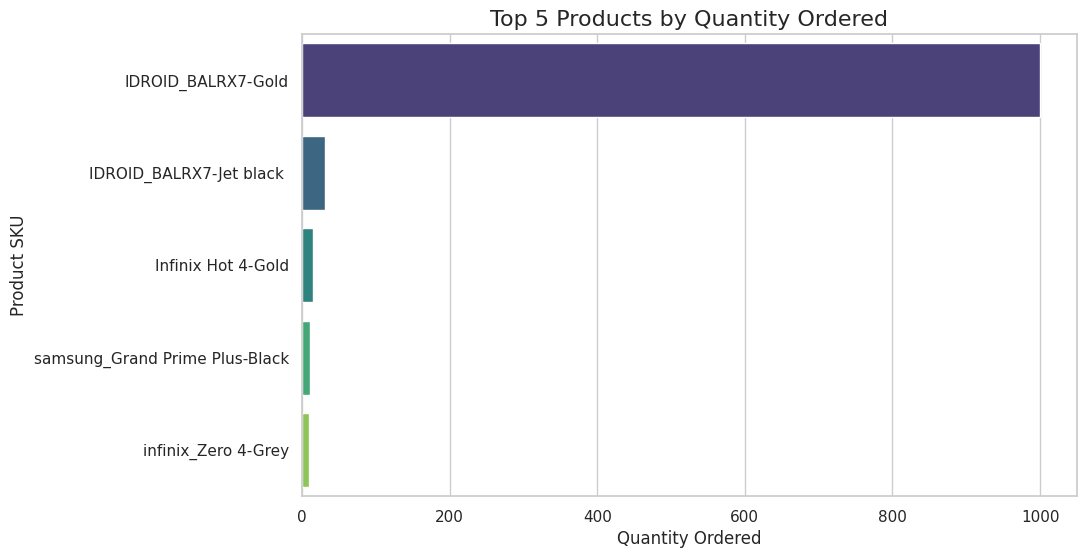

In [ ]:
# Set the Seaborn style (optional for aesthetics)
sns.set(style='whitegrid')

# Create the bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
ax = sns.barplot(x='qty_ordered', y='sku_name', data=top_5_products, palette='viridis')

# Add labels and title
plt.title('Top 5 Products by Quantity Ordered', fontsize=16)
plt.xlabel('Quantity Ordered', fontsize=12)
plt.ylabel('Product SKU', fontsize=12)

# Show the plot
plt.show()


## `No 2`
**Dear Data Analyst**,
<br></br>
Menindaklanjuti meeting gabungan Tim Werehouse dan Tim Marketing, kami menemukan bahwa ketersediaan stock produk dengan Kategori Others pada akhir 2022 kemarin masih banyak.
1. Kami mohon bantuan untuk melakukan pengecekan data penjualan kategori tersebut dengan tahun 2021 secara kuantitas penjualan. Dugaan sementara kami, telah terjadi penurunan kuantitas penjualan pada 2022 dibandingkan 2021. (Mohon juga menampilkan data ke-15 kategori)
<br></br>
2. Apabila memang terjadi penurunan kuantitas penjualan pada kategori Others, kami mohon bantuan untuk menyediakan data TOP 20 nama produk yang mengalami penurunan paling tinggi pada 2022 jika dibanding dengan 2021. Hal ini kami gunakan sebagai bahan diskusi pada meeting selanjutnya.  

Mohon bantuan untuk mengirimkan data tersebut paling lambat 4 hari dari hari ini. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Werehouse**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan valid = 1
2. Memfilter data pada transaksi selama 2021
3. Memfilter data pada transaksi selama 2022
4. Gunakan groupby berdasarkan sku_name masing-masing tahun
5. Menggabungkan kedua data dengan merge
6. Lakukan pengurangan kolom qty 2022 dengan qty 2021


```



</details>

## `Jawaban No 2.1`

In [ ]:
# Membuat perbandingan data penjualan produk berdasarkan kategori pada tahun 2021 dan 2022
# Tampilkan data ke-15 kategori

# Filter data penjualan tahun 2021 dan menghitung total qty_ordered per kategori
sales_2021_category = (
    df[
        (df['order_date'].dt.year == 2021) &  # Filter data transaksi tahun 2021
        (df['is_valid'] == 1)                # Memfilter data dengan is_valid = 1
    ]
    .groupby('category')['qty_ordered']     # Mengelompokkan data berdasarkan kategori
    .sum()                                  # Menjumlahkan total qty_ordered untuk setiap kategori
    .sort_values(ascending=False)           # Mengurutkan hasil dari terbesar ke terkecil
    .reset_index(name='Total_Quantity_2021')  # Mengatur ulang indeks dan mengganti nama kolom hasil agregasi
)

# Filter data penjualan tahun 2022 dan menghitung total qty_ordered per kategori
sales_2022_category = (
    df[
        (df['order_date'].dt.year == 2022) &  # Filter data transaksi tahun 2022
        (df['is_valid'] == 1)                # Memfilter data dengan is_valid = 1
    ]
    .groupby('category')['qty_ordered']     # Mengelompokkan data berdasarkan kategori
    .sum()                                  # Menjumlahkan total qty_ordered untuk setiap kategori
    .sort_values(ascending=False)           # Mengurutkan hasil dari terbesar ke terkecil
    .reset_index(name='Total_Quantity_2022')  # Mengatur ulang indeks dan mengganti nama kolom hasil agregasi
)

# Menggabungkan data penjualan tahun 2021 dan 2022 berdasarkan kategori
sales_category_growth = sales_2021_category.merge(sales_2022_category, on='category', how='inner')

# Menghitung pertumbuhan (growth) dari 2021 ke 2022
sales_category_growth['Quantity_Growth'] = (
    sales_category_growth['Total_Quantity_2022'] - sales_category_growth['Total_Quantity_2021']
)

# Mengurutkan data berdasarkan pertumbuhan (growth)
sales_category_growth.sort_values(by='Quantity_Growth', ascending=True, inplace=True)

# Menampilkan 15 kategori teratas dengan pertumbuhan
sales_category_growth.head(15)


,category,Total_Quantity_2021,Total_Quantity_2022,Quantity_Growth
1,Others,426,263,-163
0,Soghaat,759,612,-147
3,Men Fashion,237,175,-62
9,Beauty & Grooming,168,153,-15
7,Books,171,195,24
11,Appliances,124,148,24
6,Health & Sports,173,200,27
12,Computing,109,153,44
5,School & Education,184,237,53
4,Home & Living,193,250,57


<ipython-input-18-76b33f86f993>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=sales_category_growth, x='Quantity_Growth', y='category', palette='Blues_r')


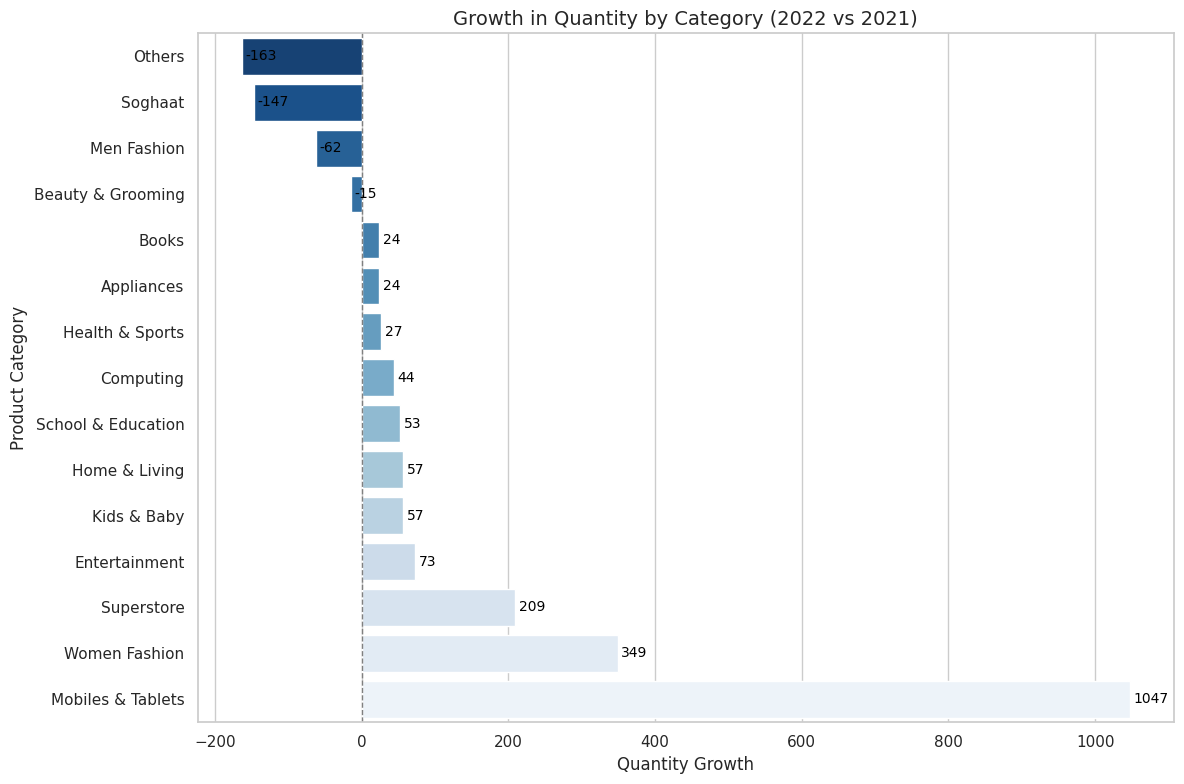

In [ ]:
# Create horizontal barplot
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=sales_category_growth, x='Quantity_Growth', y='category', palette='Blues_r')

# Add text labels for each bar
for i, (value, name) in enumerate(zip(sales_category_growth['Quantity_Growth'], sales_category_growth['category'])):
    ax.text(value + 5, i, f'{value}', color='black', va='center', fontsize=10)

# Add titles and labels
plt.title('Growth in Quantity by Category (2022 vs 2021)', fontsize=14)
plt.xlabel('Quantity Growth', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)  # Add a vertical line at 0 for reference
plt.tight_layout()
plt.show()


## `Jawaban No 2.2`

In [ ]:
# Menyediakan data TOP 20 nama produk yang mengalami penurunan paling tinggi pada 2022 jika dibanding dengan 2021

sales_2021_others = pd.DataFrame(
    df[
        (df['order_date'].dt.year == 2021) &  # Filter transaksi tahun 2021
        (df['category'] == 'Others') &       # Memfilter data category = Others
        (df['is_valid'] == 1)                # Memfilter data is_valid=1
    ]
    .groupby('sku_name')['qty_ordered']     # Mengelompokkan data berdasarkan SKU
    .sum()                                  # Menjumlah total qty_ordered untuk setiap kategori
    .sort_values(ascending=False)           # Mengurutkan hasil dari terbesar ke terkecil
    .reset_index(name='Qty_2021')           # Mengatur ulang indeks dan mengganti nama kolom hasil agregasi
)

sales_2022_others = pd.DataFrame(
    df[
        (df['order_date'].dt.year == 2022) &  # Filter transaksi tahun 2022
        (df['category'] == 'Others') &       # Memfilter data category = Others
        (df['is_valid'] == 1)                # Memfilter data is_valid=1
    ]
    .groupby('sku_name')['qty_ordered']     # Mengelompokkan data berdasarkan SKU
    .sum()                                  # Menjumlah total qty_ordered setiap kategori
    .sort_values(ascending=False)           # Mengurutkan hasil dari terbesar ke terkecil
    .reset_index(name='Qty_2022')           # Mengatur ulang indeks dan mengganti nama kolom hasil agregasi
)

# Gabungkan data penjualan tahun 2021 dan 2022
sales_comparison = pd.merge(sales_2021_others, sales_2022_others, on='sku_name', how='outer')
sales_comparison.fillna(0, inplace=True)

# Hitung penurunan kuantitas
sales_comparison['Qty_Decline'] = sales_comparison['Qty_2022'] - sales_comparison['Qty_2021']

# Urutkan berdasarkan penurunan kuantitas terbanyak
sales_comparison_sorted = sales_comparison.sort_values(by='Qty_Decline', ascending=True)

# Ambil 20 produk teratas yang mengalami penurunan kuantitas terbanyak
top_20_decline = sales_comparison_sorted.head(20)

# Menampilkan hasil
top_20_decline


,sku_name,Qty_2021,Qty_2022,Qty_Decline
69,RB_Dettol Germ Busting Kit-bf,200.0,45.0,-155.0
18,Dawlance_MD 10 + DWB 600,23.0,0.0,-23.0
84,Telemall_MM-DR-HB-L,23.0,2.0,-21.0
137,iu_Tickets General Enclosure-Islamabad,20.0,0.0,-20.0
70,RS_Rehmat-e-Shereen Mix Mithai,13.0,0.0,-13.0
141,kansai_NeverWet,10.0,1.0,-9.0
154,sindbad_Sindbad Gift Card-3,7.0,0.0,-7.0
133,emart_00-1,7.0,1.0,-6.0
93,Vouch 365 2016,5.0,0.0,-5.0
4,Am-PTV_ATS-004-M,5.0,0.0,-5.0


**VISUALIZATION**

<ipython-input-20-49802b47608b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


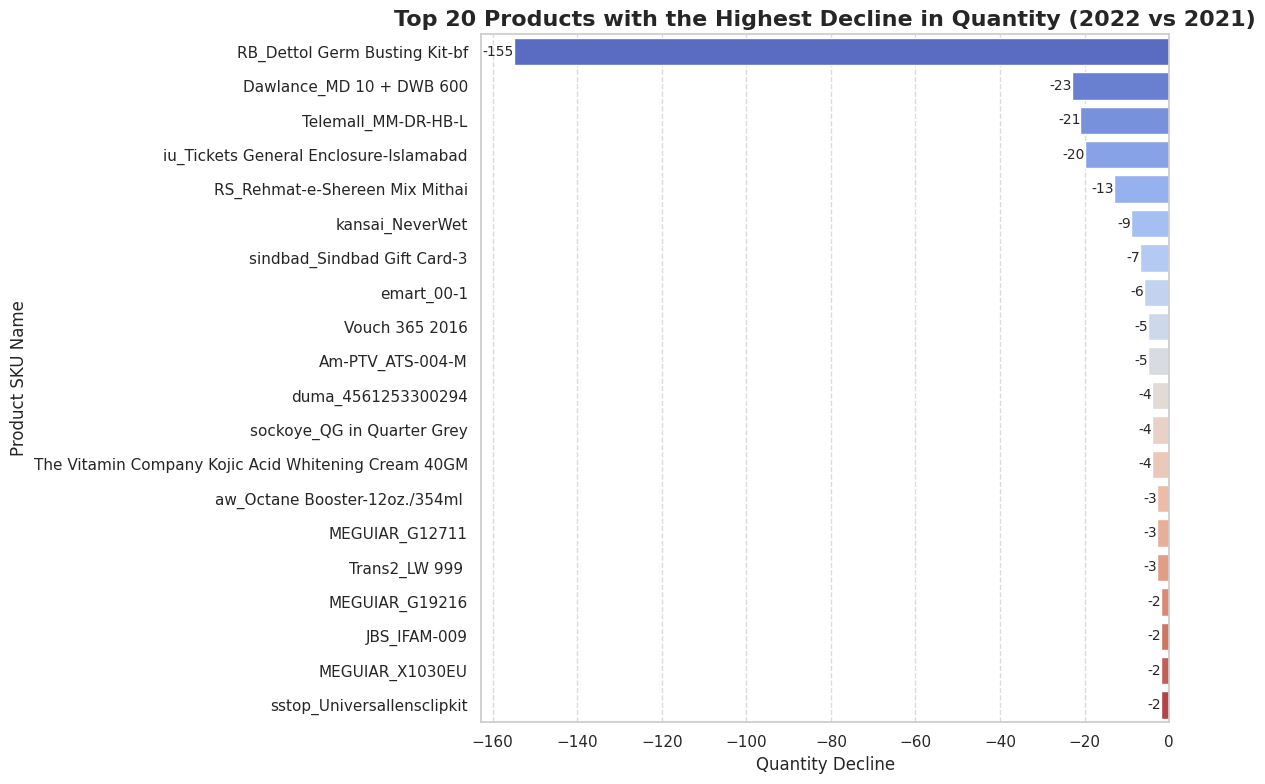

In [ ]:
# Membuat bar chart horizontal
plt.figure(figsize=(12, 8))  # Mengatur ukuran figure
sns.barplot(
    data=top_20_decline,      # Data untuk bar chart
    y='sku_name',             # Nama produk sebagai sumbu-y
    x='Qty_Decline',          # Penurunan kuantitas sebagai sumbu-x
    palette='coolwarm'        # Palet warna untuk estetika
)

# Menambahkan label nilai pada setiap bar
for index, value in enumerate(top_20_decline['Qty_Decline']):
    plt.text(value, index, f'{value:.0f}', va='center', ha='right' if value < 0 else 'left', fontsize=10)

# Menambahkan judul dan label sumbu
plt.title('Top 20 Products with the Highest Decline in Quantity (2022 vs 2021)', fontsize=16, fontweight='bold')
plt.xlabel('Quantity Decline', fontsize=12)
plt.ylabel('Product SKU Name', fontsize=12)

# Menambahkan grid untuk tampilan yang lebih rapi
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.tight_layout()
plt.show()


## `No 3`
**Dear Data Analyst**,
<br></br>
Terkait ulang tahun perusahaan pada 2 bulan mendatang, Tim Digital Marketing akan memberikan informasi promo bagi pelanggan pada akhir bulan ini. Kriteria pelanggan yang akan kami butuhkan adalah mereka yang sudah melakukan check-out namun belum melakukan pembayaran (is_gross = 1) selama tahun 2022. Data yang kami butuhkan adalah ID Customer dan Registered Date.

Mohon bantuan, untuk mengirimkan data tersebut sebelum akhir bulan ini ke Tim Digital Marketing. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Digital Marketing**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan gross = 1
2. Memfilter data dengan valid = 0
3. Memfilter data dengan net = 0
4. Memfilter data pada transaksi selama 2022


```



</details>

## `Jawaban No 3`

In [ ]:
import pandas as pd

# Memfilter data berdasarkan kriteria yang diberikan
filtered_data = df[
    (df['is_gross'] == 1) &  # gross = 1
    (df['is_valid'] == 0) &  # valid = 0
    (df['is_net'] == 0) &    # net = 0
    (df['order_date'].dt.year == 2022)  # Transaksi selama tahun 2022
]

# Mengambil kolom ID Customer dan Registered Date
result = filtered_data[['customer_id', 'registered_date']].drop_duplicates()

# Menampilkan hasil
print(result)


     customer_id registered_date
9       C246762L      2022-05-08
18      C848774L      2021-11-07
19      C693415L      2022-04-12
21      C180595L      2022-04-22
22      C587425L      2022-03-22
...          ...             ...
5855    C653797L      2022-04-03
5856    C394076L      2021-10-12
5859    C248585L      2022-07-10
5865    C471304L      2022-05-13
5881    C265450L      2022-02-17

[820 rows x 2 columns]


In [ ]:
# Menyimpan filtered_data ke dalam file CSV
filtered_data.to_csv('audience_list.csv', encoding='utf-8-sig', index=False)

# Mengunduh file CSV
from google.colab import files
files.download('audience_list.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## `No 4`
**Dear Data Analyst**,
<br></br>
Pada bulan October hingga Desember 2022, kami melakukan campaign setiap hari Sabtu dan Minggu. Kami hendak menilai, apakah campaign tersebut cukup berdampak pada kenaikan penjualan (before_discount). Mohon bantuan untuk menampilkan data:
1. Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) per bulan tersebut. Apakah ada peningkatan penjualan pada masing-masing bulan tersebut.
2. Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) keseluruhan 3 bulan tersebut.

Mohon bantuan untuk mengirimkan data tersebut paling lambat minggu depan. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Campaign**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Buatlah kolom baru untuk day, month, dan month number
2. Memfilter data dengan valid = 1
3. Memfilter data dengan day termasuk 'Saturday', 'Sunday' dengan menggunakan fungsi isin dan simpan dalam variable 'weekends'
4. Memfilter data dengan day termasuk 'Monday','Tuesday','Wednesday','Thusday','Friday' dengan menggunakan fungsi isin dan simpan dengan variabel 'weekday'
5. Memfilter data pada transaksi selama 2022 bulan Oktober sampai dengan Desember
6. Gunakan groupby berdasarkan pada masing-masing variabel
7. Menggabungkan kedua data dengan merge
8. Tampilkan pada grafik batang untuk melihat perbedaananya


```



</details>

## `Jawaban No 4.1`

In [ ]:
# Tambahkan kolom day, month, dan month_number
df['day'] = df['order_date'].dt.day_name()  # Menambahkan nama hari
df['month'] = df['order_date'].dt.month_name()  # Nama bulan
df['month_number'] = df['order_date'].dt.month  # Angka bulan

# Filter data berdasarkan kriteria
filtered_data = df[
    (df['is_valid'] == 1) &  # Hanya valid data
    (df['order_date'].dt.year == 2022) &  # Tahun 2022
    (df['order_date'].dt.month.isin([10, 11, 12]))  # Oktober-Desember
]

# Menghitung rata-rata harian 'weekdays'
weekdays_avg = (
    filtered_data[filtered_data['day'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
    .groupby('month_number')['before_discount']  # Mengelompokkan berdasarkan bulan
    .mean()  # Menghitung rata-rata
    .round(2)  # Pembulatan ke 2 angka desimal
    .reset_index(name='avg_sales_weekdays')  # Mengatur ulang indeks dan mengganti nama kolom hasil agregasi
)

# Menghitung rata-rata harian 'weekends'
weekends_avg = (
    filtered_data[filtered_data['day'].isin(['Saturday', 'Sunday'])]  # Filter weekends
    .groupby('month_number')['before_discount']  # Mengelompokkan berdasarkan bulan
    .mean()  # Menghitung rata-rata
    .round(2)  # Pembulatan ke 2 angka desimal
    .reset_index(name='avg_sales_weekends')  # Mengatur ulang indeks dan mengganti nama kolom hasil agregasi
)


**TABLE RESULT**

In [ ]:
# Merge hasil agregasi weekdays dan weekends berdasarkan 'month_number'
monthly_avg = pd.merge(weekdays_avg, weekends_avg, on='month_number')
monthly_avg['month'] = monthly_avg['month_number'].map({10: 'October', 11: 'November', 12: 'December'})
monthly_avg

# Tambahkan kolom perbedaan dan persentase perubahan
monthly_avg['difference'] = (monthly_avg['avg_sales_weekends'] - monthly_avg['avg_sales_weekdays']).round(2)
monthly_avg['%diff'] = (monthly_avg['difference'] / monthly_avg['avg_sales_weekdays'] * 100).round(2)  # Persentase perubahan

# Tampilkan Tabel
print(monthly_avg[['month', 'avg_sales_weekdays', 'avg_sales_weekends', 'difference', '%diff']])


      month  avg_sales_weekdays  avg_sales_weekends  difference  %diff
0   October           874690.27           634260.07  -240430.20 -27.49
1  November           641862.00           607794.21   -34067.79  -5.31
2  December           813574.29           410599.40  -402974.89 -49.53


**VISUALIZATION RESULT**

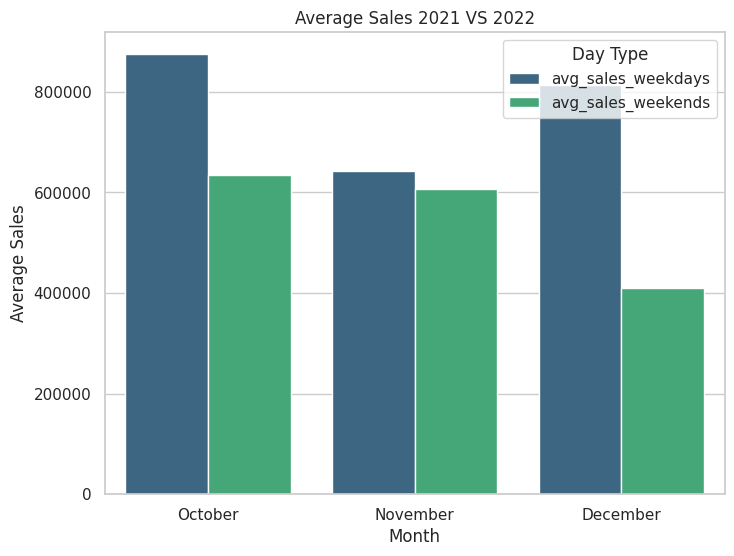

In [ ]:
# Visualisasi Grafik
plt.figure(figsize=(8, 6))
sns.barplot(
    data=monthly_avg.melt(
        id_vars='month',
        value_vars=['avg_sales_weekdays', 'avg_sales_weekends'],
        var_name='Day Type',
        value_name='Average Sales'
    ),
    x='month', y='Average Sales', hue='Day Type', palette='viridis'  # Grafik batang
)

plt.title("Average Sales 2021 VS 2022")
plt.ylabel("Average Sales")
plt.xlabel("Month")
plt.legend(title="Day Type", loc="upper right")
plt.show()


## `Jawaban No 4.2`

In [ ]:
# Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat)
# keseluruhan 3 bulan tersebut.
# Tambahkan kolom day, month, dan month_number
# Filter data untuk weekends dan weekdays
weekends = filtered_data[filtered_data['day'].isin(['Saturday', 'Sunday'])]  # Filter weekends
weekdays = filtered_data[filtered_data['day'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]  # Filter weekdays

# Menghitung rata-rata harian untuk keseluruhan data (weekends & weekdays)
weekends_avg_overall = weekends['before_discount'].mean()  # Menghitung rata-rata penjualan 'before_discount'
weekdays_avg_overall = weekdays['before_discount'].mean()  # Menghitung rata-rata penjualan 'before_discount'

# Menggabungkan data weekends dan weekdays
overall_avg = pd.DataFrame({
    'Day Type': ['Weekdays', 'Weekends'],  # Menambahkan kolom 'Day Type' dengan nilai 'Weekdays' dan 'Weekends'
    'Average Sales': [weekdays_avg_overall, weekends_avg_overall],  # Menambahkan kolom 'Average Sales' dengan nilai rata-rata
    'Month': ['October - December', 'October - December'],  # Menambahkan kolom 'Month' dengan label untuk periode data
})

# Membuat tabel perbandingan selisih dan persentase perubahan
overall_comparison = {
    'Quarter': "Q4",  # Kuartal
    'Average Weekends': weekends_avg_overall.round(2),
    'Average Weekdays': weekdays_avg_overall.round(2),
    'Difference': (weekends_avg_overall - weekdays_avg_overall).round(2),
    '%Diff': (((weekends_avg_overall - weekdays_avg_overall) / weekdays_avg_overall) * 100).round(2)
}

# Tampilkan hasil tabel dengan selisih dan persentase
pd.DataFrame([overall_comparison])


,Quarter,Average Weekends,Average Weekdays,Difference,%Diff
0,Q4,558865.15,770146.01,-211280.86,-27.43


<ipython-input-29-761c4d49d4fc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=overall_avg, x='Day Type', y='Average Sales', palette='viridis')  # Membuat grafik batang


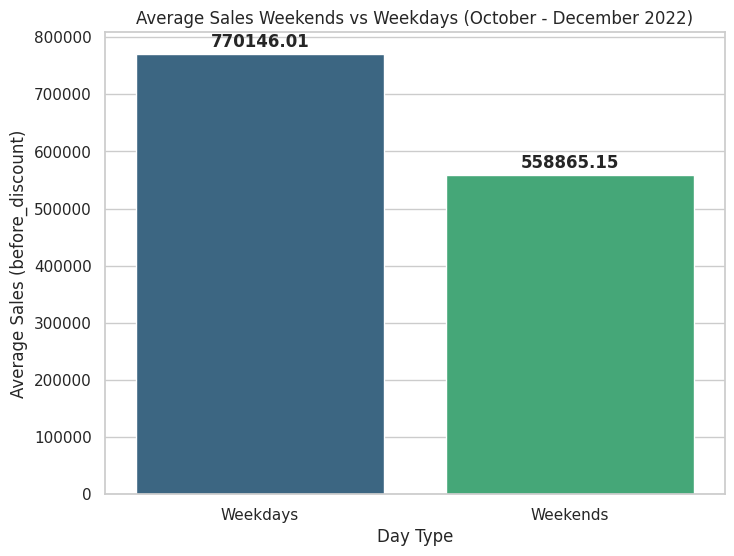

In [ ]:
# Visualisasi grafik
plt.figure(figsize=(8, 6))  # Membuat ukuran grafik 8x6 inci
sns.barplot(data=overall_avg, x='Day Type', y='Average Sales', palette='viridis')  # Membuat grafik batang

plt.title("Average Sales Weekends vs Weekdays (October - December 2022)")  # Menambahkan judul grafik
plt.ylabel("Average Sales (before_discount)")  # Menambahkan label pada sumbu Y
plt.xlabel("Day Type")  # Menambahkan label pada sumbu X

# Menambahkan nilai rata-rata pada grafik untuk memperjelas
for i, v in enumerate(overall_avg['Average Sales']):  # Melakukan iterasi untuk setiap nilai
    plt.text(i, v + 5000, f"{v:.2f}", ha='center', va='bottom', fontweight='bold')  # Menambahkan teks pada batang

plt.show()
